In [1]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

%matplotlib inline
label_size = 22 + 2
tick_size = 20 + 2
title_size = 24 + 2
legend_size = 18

plt.rcParams["font.family"] = "Palatino"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

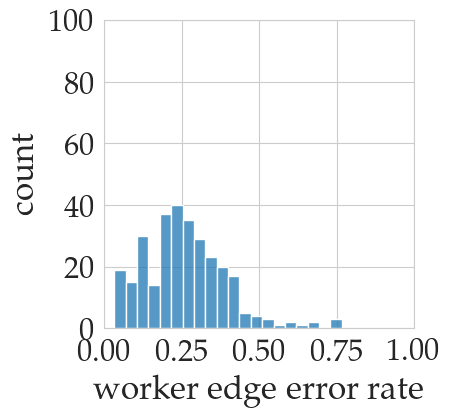

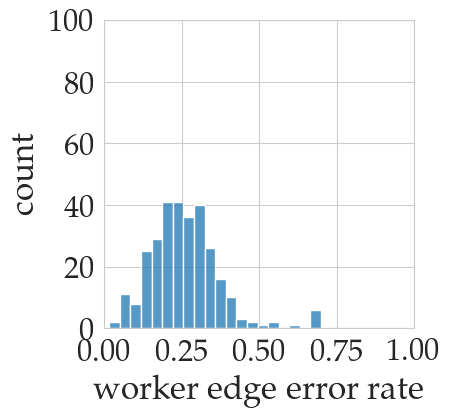

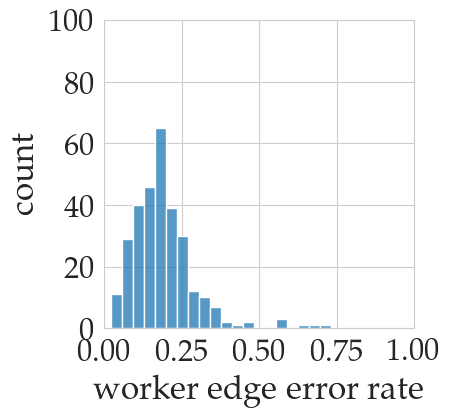

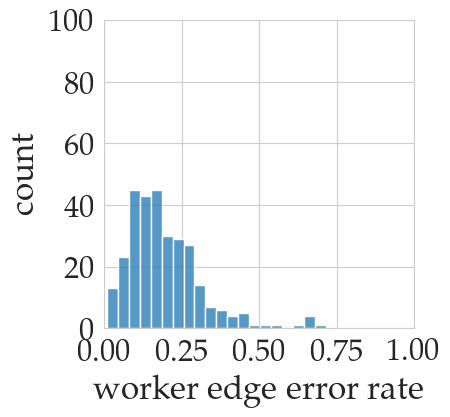

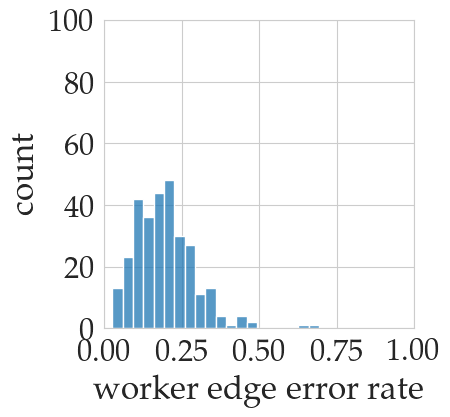

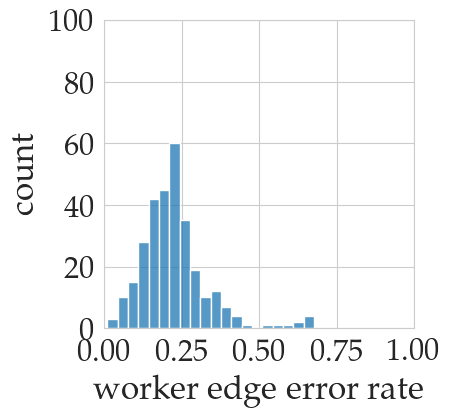

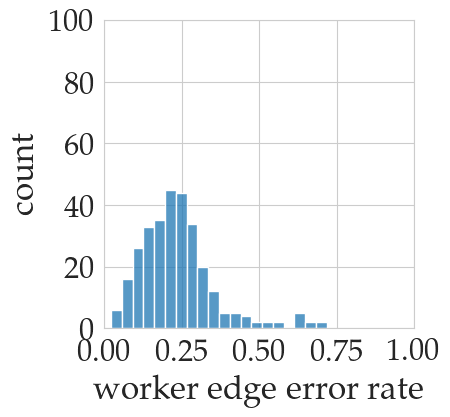

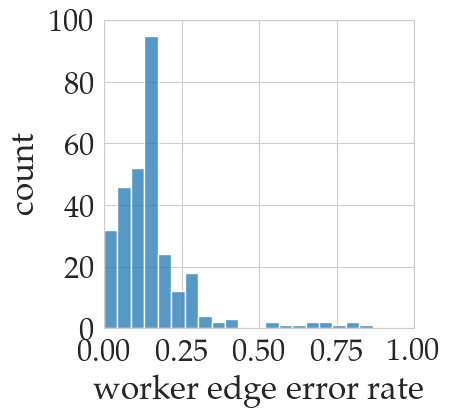

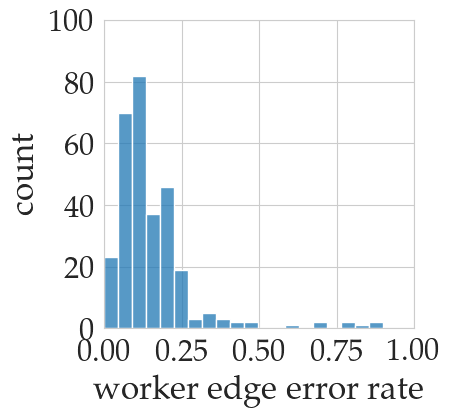

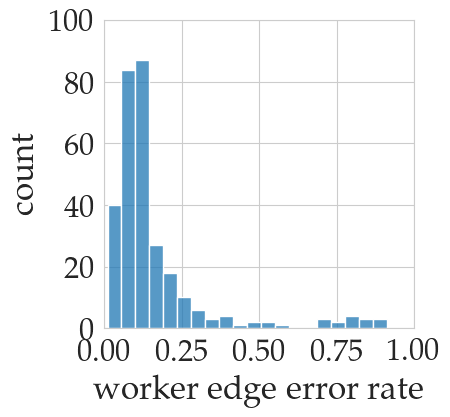

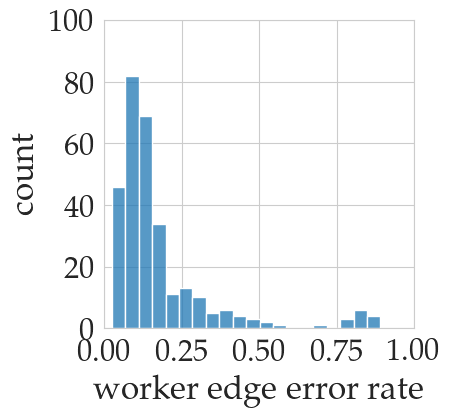

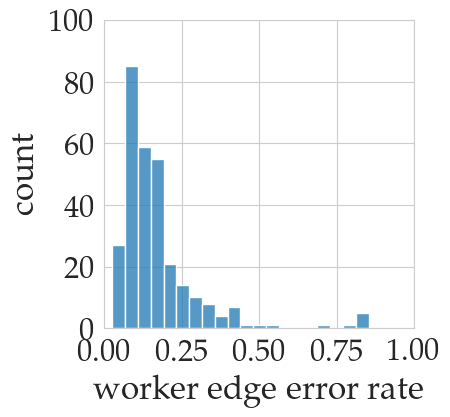

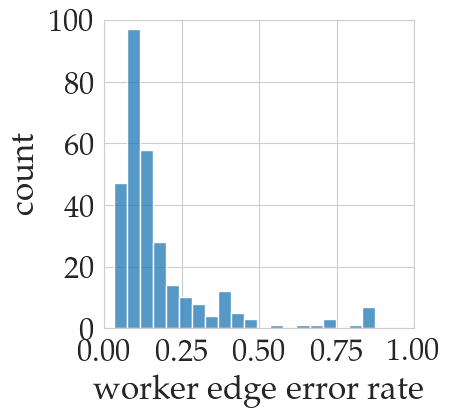

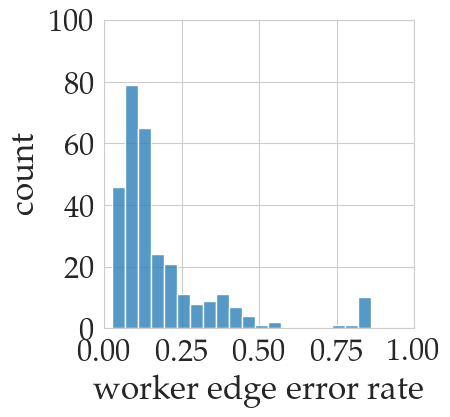

In [4]:
mode = "drag_and_drop"
for dataset in ["dogs3", "birds5"]:
    edge_error_df = pd.read_csv(f"./csv/edge_error_per_worker_{dataset}_{mode}.csv")
    edge_error_df["num_1_error_rate"] = (
        1 - edge_error_df["num_1_correct"] / edge_error_df["num_1"]
    )
    edge_error_df["num_0_error_rate"] = (
        1 - edge_error_df["num_0_correct"] / edge_error_df["num_0"]
    )
    edge_error_df["edge_error_rate"] = (
        1 - edge_error_df["num_correct_edges"] / edge_error_df["num_edges"]
    )
    for i in range(7):
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111)
        m = i + 2
        sns.histplot(
            data=edge_error_df[edge_error_df.num_images_per_question == m],
            x="edge_error_rate",
            ax=ax,
            bins=20,
        )
        ax.set_yticks([0, 20, 40, 60, 80, 100])
        ax.set_ylim((0, 100))
        ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
        ax.set_xlim((0, 1))
        ax.set_xlabel("worker edge error rate", fontsize=label_size)
        ax.set_ylabel("count", fontsize=label_size)
        ax.tick_params(axis="both", which="major", labelsize=tick_size)
        # ax.set_title("(" + f"{chr(97 + i)}" + ")", loc="center", y=0, fontsize=title_size, pad=-40, verticalalignment="top")
        fig.savefig(
            f"plots/worker_edge_error_rate_{dataset}_{mode}_histogram_m={m}.png",
            dpi=300,
            format="png",
            bbox_inches="tight",
        )